┌───┐                ░ ┌─┐         
   q_0: ┤ H ├──■────■────■───░─┤M├─────────
        └───┘┌─┴─┐  │    │   ░ └╥┘┌─┐      
   q_1: ─────┤ X ├──┼────┼───░──╫─┤M├──────
             └───┘┌─┴─┐  │   ░  ║ └╥┘┌─┐   
   q_2: ──────────┤ X ├──┼───░──╫──╫─┤M├───
                  └───┘┌─┴─┐ ░  ║  ║ └╥┘┌─┐
   q_3: ───────────────┤ X ├─░──╫──╫──╫─┤M├
                       └───┘ ░  ║  ║  ║ └╥┘
meas: 4/════════════════════════╩══╩══╩══╩═
                                0  1  2  3

global phase: 3π/2
         ┌─────────┐┌───────┐                                                    ░ ┌─┐         
q_0 -> 0 ┤ Ry(π/2) ├┤ Rx(π) ├─■─────────────■─────────────■──────────────────────░─┤M├─────────
         ├─────────┤├───────┤ │ ┌─────────┐ │  ┌───────┐  │                      ░ └╥┘┌─┐      
q_1 -> 1 ┤ Ry(π/2) ├┤ Rx(π) ├─■─┤ Ry(π/2) ├─┼──┤ Rx(π) ├──┼──────────────────────░──╫─┤M├──────
         ├─────────┤├───────┤   └─────────┘ │ ┌┴───────┴┐ │  ┌───────┐           ░  ║ └╥┘┌─┐   
q_2 -> 2 ┤ Ry(π/2) ├┤ Rx(π) ├───────────────■─┤ Ry(π/2) ├─┼──┤ Rx(π) ├───────────░──╫──╫─┤M├───
         ├─────────┤├───────┤                 └─────────┘ │ ┌┴───────┴┐┌───────┐ ░  ║  ║ └╥┘┌─┐
q_3 -> 3 ┤ Ry(π/2) ├┤ Rx(π) ├─────────────────────────────■─┤ Ry(π/2) ├┤ Rx(π) ├─░──╫──╫──╫─┤M├
         └─────────┘└───────┘                               └─────────┘└───────┘ ░  ║  ║  ║ └╥┘
 meas: 4/═══════════════════════════════════════════════════════════════════════════╩══╩══╩══╩═
                                                                                    0  1  2  3

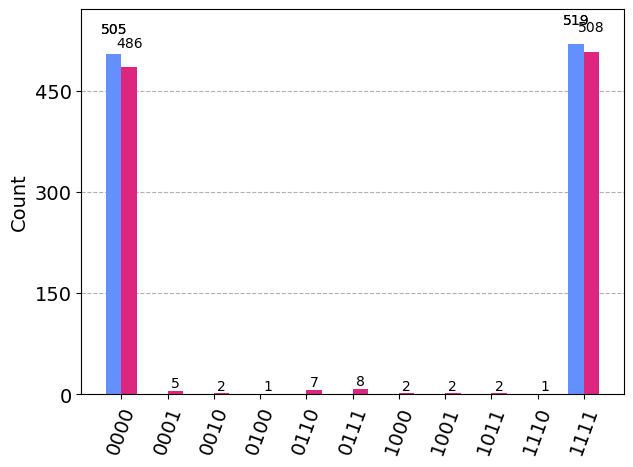

In [23]:
from huayi_providers.fake_Huayi8 import FakeHuayi8, FakeHuayi8V2
from qiskit.circuit.library import EfficientSU2
from qiskit import transpile
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

qc = QuantumCircuit(4)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.cx(0,3)
qc.measure_all()
display( qc.draw() )


circ_huayi = transpile(qc, backend=FakeHuayi8())
display( circ_huayi.draw(fold=-1,idle_wires=False) )


ideal_output = AerSimulator().run(qc).result().get_counts()
huayi_sim = FakeHuayi8().run(circ_huayi, backend=FakeHuayi8()).result().get_counts()

plot_histogram([ideal_output, huayi_sim])

In [26]:
import mthree

tcs = transpile([qc]*2, backend=FakeHuayi8())
mappings = mthree.utils.final_measurement_mapping(tcs)

counts = FakeHuayi8().run(tcs, backend=FakeHuayi8(),shots=10000).result().get_counts()

mit = mthree.M3Mitigation(FakeHuayi8())
mit.cals_from_system(mappings, shots=10000)
quasis = mit.apply_correction(counts, mappings, return_mitigation_overhead=True)




In [30]:
mappings

[{0: 0, 1: 1, 2: 2, 3: 3}, {0: 0, 1: 1, 2: 2, 3: 3}]

In [29]:
mit.__dict__

{'system': <FakeHuayi8('fake_Huayi8')>,
 'system_info': {'inoperable_qubits': [],
  'name': 'fake_Huayi8',
  'num_qubits': 8,
  'max_shots': 6000,
  'simulator': True},
 'single_qubit_cals': [array([[9.999e-01, 1.000e-04],
         [1.000e-04, 9.999e-01]]),
  array([[9.998e-01, 0.000e+00],
         [2.000e-04, 1.000e+00]]),
  array([[9.998e-01, 5.000e-04],
         [2.000e-04, 9.995e-01]]),
  array([[9.995e-01, 0.000e+00],
         [5.000e-04, 1.000e+00]]),
  None,
  None,
  None,
  None],
 'num_qubits': 8,
 'iter_threshold': 4096,
 'cal_shots': 10000,
 'cal_method': 'independent',
 'cal_timestamp': '2023-12-29T02:30:42.227432+00:00',
 'rep_delay': None,
 '_thread': None,
 '_job_error': None,
 'cals_file': None,
 'faulty_qubits': [],
 '_balanced_shots': None}

In [34]:
quasis.expval([['IIII', 'ZZZZ', '0000', '1111'], ['IIII', 'ZZZZ']])



[array([1.        , 0.94794047, 0.4850835 , 0.47768268]),
 array([1.        , 0.95212447])]